In [1]:
# Importing necessary libraries
import pandas as pd
from collections import Counter

In [2]:
data = pd.read_csv('../data/papers.csv')
data

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Tao D.; Zhang R.; Xu J.; Zheng L.; Zhang G.; Z...,"Tao, Dawei (36679177300); Zhang, Ruijin (57787...",36679177300; 57787223400; 57196735064; 5852592...,Understanding the nature of early agriculture ...,2023,Journal of Archaeological Science: Reports,51,NaN,104162,NaN,...,NaN,NaN,NaN,English,J.Archaeol. Sci. Rep.,Article,Final,NaN,Scopus,2-s2.0-85166970356
1,Promkhambut A.; Yokying P.; Woods K.; Fisher M...,"Promkhambut, Arunee (36551471600); Yokying, Ph...",36551471600; 57194175299; 56427044400; 5643033...,Rethinking agrarian transition in Southeast As...,2023,World Development,169,NaN,106309,NaN,...,NaN,NaN,NaN,English,World Dev.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85161705867
2,Rasekhi S.; Mofidi-Chelan M.; Skataric G.; Vär...,"Rasekhi, Sareh (58654635100); Mofidi-Chelan, M...",58654635100; 57212586859; 57206668275; 1483196...,Sustainability of the local stakeholder networ...,2023,Applied Geography,161,NaN,103093,NaN,...,NaN,NaN,NaN,English,Appl. Geogr.,Article,Final,NaN,Scopus,2-s2.0-85174464410
3,Oktavianus J.; Davidson B.,"Oktavianus, Jeffry (57219595487); Davidson, Br...",57219595487; 57226274860,Countering terrorism on social media: An analy...,2023,Communication and the Public,8,4,NaN,308,...,NaN,NaN,NaN,English,Communication and the Public,Article,Final,NaN,Scopus,2-s2.0-85166207236
4,Junger L.; Davids P.; Stöglehner G.; Hartmann T.,"Junger, L. (57226157526); Davids, P. (57208921...",57226157526; 57208921403; 57211128670; 3579539...,Multidimensional resilience - flood recovery o...,2023,International Journal of Disaster Risk Reduction,96,NaN,103993,NaN,...,NaN,NaN,NaN,English,Int. J. Disaster Risk Reduct.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85170416926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,Gillen M.,"Gillen, Mike (8861678000)",8861678000,Urban governance and vulnerability: Exploring ...,2005,Cities,22,1,NaN,55,...,NaN,NaN,NaN,English,Cities,Article,Final,NaN,Scopus,2-s2.0-27444442266
2623,Pelling M.; High C.,"Pelling, Mark (7003350514); High, Chris (16506...",7003350514; 16506507200,Understanding adaptation: What can social capi...,2005,Global Environmental Change,15,4,NaN,308,...,NaN,GECHE,NaN,English,Global Environ. Change,Article,Final,NaN,Scopus,2-s2.0-27744523506
2624,Degg M.R.; Chester D.K.,"Degg, Martin R. (55200929600); Chester, David ...",55200929600; 7004271121,Seismic and volcanic hazards in Peru: Changing...,2005,Geographical Journal,171,2,NaN,125,...,NaN,GGJOA,NaN,English,Geogr. J.,Article,Final,NaN,Scopus,2-s2.0-22144457915
2625,Pugh J.,"Pugh, Jonathan (55349800400)",55349800400,Environmental planning in Barbados: A confiden...,2005,Southeastern Geographer,45,2,NaN,192,...,NaN,NaN,NaN,English,Southeast. Geogr.,Article,Final,NaN,Scopus,2-s2.0-27244449338


In [3]:
# Combine 'Author Keywords' and 'Index Keywords' into one column
data['Combined Keywords'] = data[['Author Keywords', 'Index Keywords']].apply(lambda x: '; '.join(x.dropna().astype(str)), axis=1)
data['Combined Keywords'] = data['Combined Keywords'].str.lower()
data[['Title', 'Combined Keywords']].head()

,Title,Combined Keywords
0,Understanding the nature of early agriculture ...,agricultural sustainability; archaeobotany; ce...
1,Rethinking agrarian transition in Southeast As...,agrarian transition; rice; smallholder persist...
2,Sustainability of the local stakeholder networ...,cooperation; social capital; social resilience...
3,Countering terrorism on social media: An analy...,collective actions; counter-terrorism; framing...
4,Multidimensional resilience - flood recovery o...,financial resilience; flood risk management; l...


In [4]:
# Split the combined keywords into a list of keywords
data['Keyword List'] = data['Combined Keywords'].apply(lambda x: [keyword.strip() for keyword in x.split(';')])
data[['Title', 'Combined Keywords', 'Keyword List']].head()

,Title,Combined Keywords,Keyword List
0,Understanding the nature of early agriculture ...,agricultural sustainability; archaeobotany; ce...,"[agricultural sustainability, archaeobotany, c..."
1,Rethinking agrarian transition in Southeast As...,agrarian transition; rice; smallholder persist...,"[agrarian transition, rice, smallholder persis..."
2,Sustainability of the local stakeholder networ...,cooperation; social capital; social resilience...,"[cooperation, social capital, social resilienc..."
3,Countering terrorism on social media: An analy...,collective actions; counter-terrorism; framing...,"[collective actions, counter-terrorism, framin..."
4,Multidimensional resilience - flood recovery o...,financial resilience; flood risk management; l...,"[financial resilience, flood risk management, ..."


In [5]:
# Create a unique list of all keywords
unique_keywords = set()
for keywords in data['Keyword List']:
    unique_keywords.update(keywords)

print(f'Total number of unique concepts: {len(unique_keywords)}')

Total number of unique concepts: 9831


In [6]:
# Count the frequency of each keyword across all rows
total_keyword_count = Counter()
for keywords in data['Keyword List']:
    total_keyword_count.update(keywords)
    
total_keyword_count.most_common(10)

[('resilience', 489),
 ('climate change', 460),
 ('vulnerability', 394),
 ('sustainability', 234),
 ('disaster management', 172),
 ('adaptive management', 161),
 ('risk assessment', 155),
 ('adaptation', 154),
 ('social capital', 137),
 ('', 136)]

In [7]:
# Convert the Counter object to a dataframe
keywords_df = pd.DataFrame(total_keyword_count.items(), columns=['Concepts', 'Total'])
keywords_df = keywords_df.sort_values(by='Total', ascending=False)
keywords_df = keywords_df.reset_index(drop=True)
keywords_df = keywords_df[(keywords_df['Concepts'] != '')]
keywords_df.head(10)

,Concepts,Total
0,resilience,489
1,climate change,460
2,vulnerability,394
3,sustainability,234
4,disaster management,172
5,adaptive management,161
6,risk assessment,155
7,adaptation,154
8,social capital,137
10,china,135


In [8]:
# Save the dataframe to a CSV file
keywords_df.to_csv('../data/all_keyword_frequency.csv', index=False)

/var/folders/vt/9xf6xhpx3b16kyttfwqfh3kr0000gr/T/ipykernel_73096/2984237000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Concepts', data=top_10, palette='viridis')


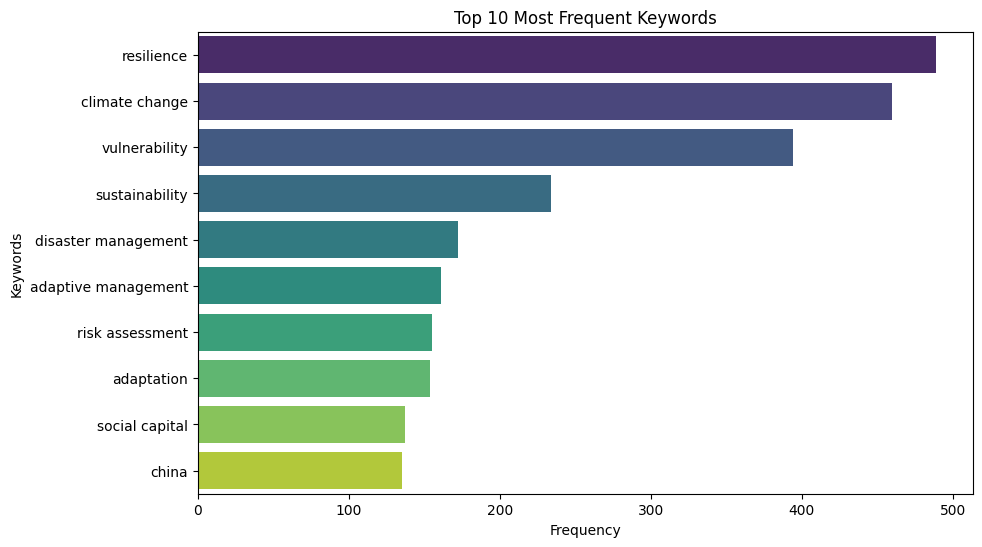

In [ ]:
# Plot top 10 keywords
import matplotlib.pyplot as plt
import seaborn as sns
top_10 = keywords_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Concepts', data=top_10, palette='viridis')
plt.title('Top 10 Most Frequent Keywords')
plt.xlabel('Frequency')
plt.ylabel('All Keywords')
plt.show()